In [38]:
import numpy as np
import pandas as pd
import fooof as fm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from neurodsp.sim import (
    sim_combined,
    sim_synaptic_current,
    sim_synaptic_kernel,
    sim_knee,
    sim_peak_oscillation,
    sim_oscillation,
    sim_powerlaw,
)
from neurodsp.sim.utils import rotate_timeseries
from neurodsp.spectral import compute_spectrum
from neurodsp.plts.time_series import plot_time_series
from neurodsp.plts import plot_power_spectra
from neurodsp.utils import create_times

In [ ]:
# create figure and gridspec
fig = plt.figure(figsize=(7,10), constrained_layout=True)
gs = gridspec.GridSpec(figure=fig, ncols=1, nrows=5, 
                        height_ratios=[0.75, 0.5, 0.5, 0.5, 0.75])

# Add variable freq range plots
# ax_e = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[0],
#                                         width_ratios=[1, 1, 1, 1])
# plot_variable_freq_ranges(fig, ax_e)
# plot_diff_time_wins(fig, plt.subplot(ax_e[3]))


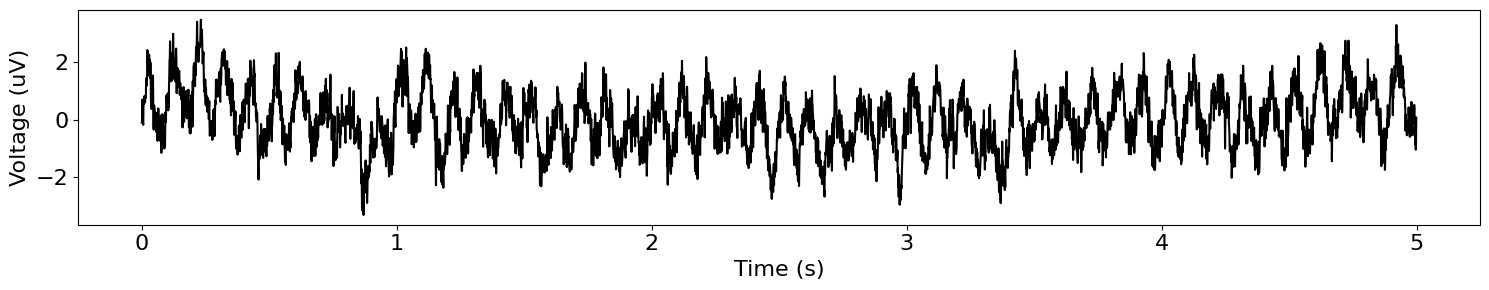

In [ ]:
events = [0.25, 0.75, 1.15, 3.25, 3.5, 4.2]
event_win = 0.25
sim_components = {
    "sim_powerlaw": {"exponent": -1},
    "sim_oscillation": [{"freq": 10}],
}
fs = 1000
sig = sim_combined(n_seconds=5, fs=fs, components=sim_components)

times = create_times(n_seconds=5, fs=1000)

plot_time_series(times, sig)

250 500
750 1000
1150 1400
3250 3500
3500 3750
4200 4450


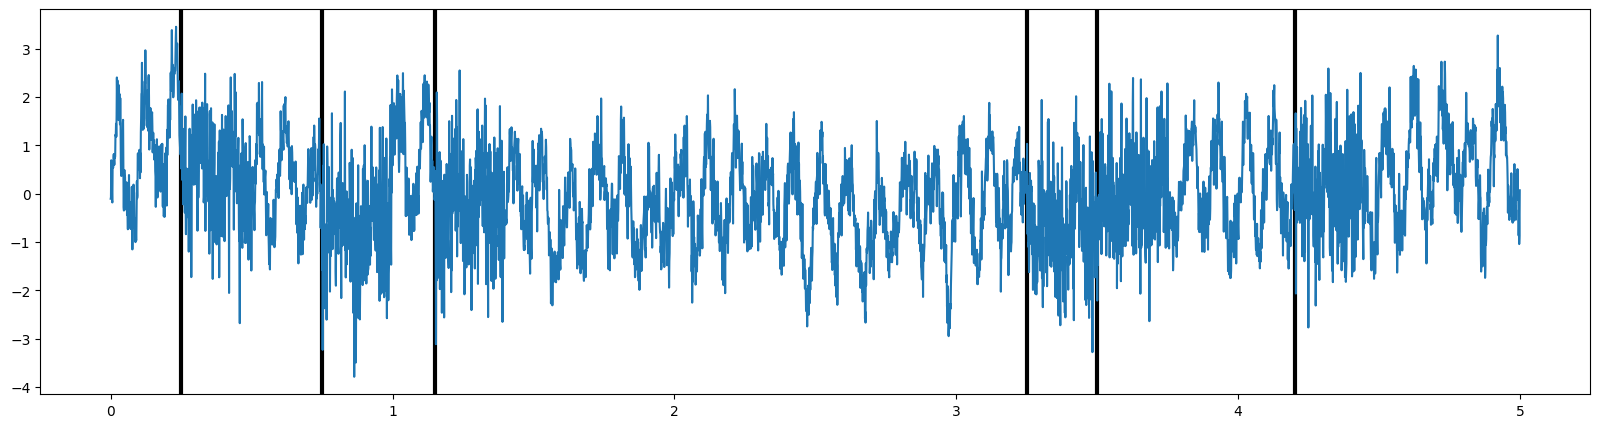

In [54]:
fig,ax = plt.subplots(figsize=(20,5))

for ev in events:
    ev_idx = int(ev*fs)
    ev_idx_end = int(ev_idx + (event_win*fs))
    print(ev_idx, ev_idx_end)

    mod_sig = sig[ev_idx : ev_idx_end]
    rotated = rotate_timeseries(sig=mod_sig, fs=fs, delta_exp=-1, f_rotation=40)
    sig[ev_idx : ev_idx_end ] = rotated
    ax.axvline(ev, color='k', linewidth=3)

ax.plot(times, sig)

In [40]:
rotated.shape

(250,)

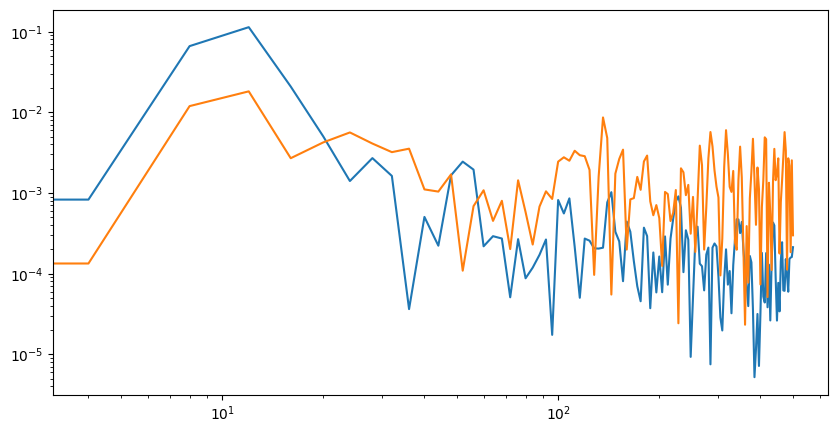

In [59]:
fig,ax = plt.subplots(figsize=(10,5))
freqs, pows = compute_spectrum(sig = sig[ev_idx - 250 : ev_idx ], fs=fs)
plt.loglog(freqs,pows)
freqs, pows = compute_spectrum(sig = sig[ev_idx : ev_idx_end ], fs=fs)
plt.loglog(freqs,pows)